In [1]:
using Revise

using LinearAlgebra
import PolynomialQTT
import TensorCrossInterpolation as TCI
import QuanticsGrids as QG
using CairoMakie
using LaTeXStrings

import Pkg; Pkg.status()

Project PolynomialQTT v0.1.0
Status `~/src/TCI/PolynomialQTT/Project.toml`
  [b261b2ec] TensorCrossInterpolation v0.9.6
  [37e2e46d] LinearAlgebra


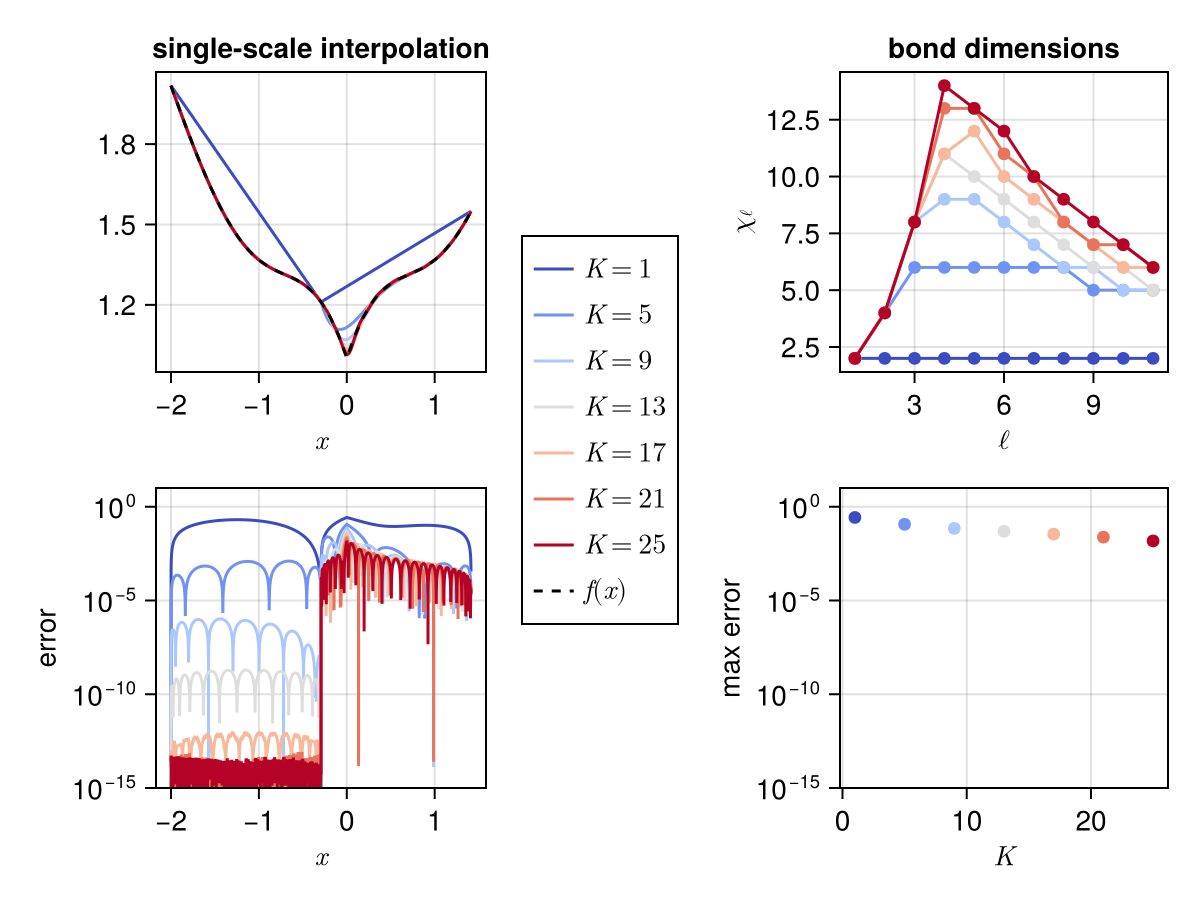

In [2]:
R = 12
a, b = -2.0, sqrt(2)
f(x) = exp(-x^2) + abs(x)
Kmax = 25

grid = QG.DiscretizedGrid{1}(R, a, b)

plotquantics = QG.grididx_to_quantics.(Ref(grid), 1:2^R)
plotx = QG.grididx_to_origcoord.(Ref(grid), 1:2^R)
origdata = f.(plotx)

fig = Figure()
ax = Axis(fig[1, 1], xlabel=L"x", title="single-scale interpolation")
axerr = Axis(fig[2, 1], yscale=log10, xlabel=L"x", ylabel="error")
axbonddim = Axis(fig[1, 3], xlabel=L"\ell", ylabel=L"\chi_\ell", title="bond dimensions")
axerrK = Axis(fig[2, 3], yscale=log10, xlabel=L"K", ylabel="max error")

for K in 1:4:Kmax
    tt = PolynomialQTT.interpolatesinglescale(f, a, b, R, K)
    ttdata = tt.(plotquantics)
    colorkwargs = (:color=>K, :colorrange=>(1, Kmax), :colormap=>:coolwarm)
    lines!(ax, plotx, ttdata, label=L"K=%$K"; colorkwargs...)
    lines!(axerr, plotx, abs.(ttdata .- origdata); colorkwargs...)
    scatterlines!(axbonddim, 1:R-1, TCI.linkdims(tt); colorkwargs...)
    scatter!(axerrK, K, maximum(abs, ttdata .- origdata); colorkwargs...)
end

lines!(ax, plotx, origdata, linestyle=:dash, color=:black, label=L"f(x)")

Legend(fig[1:2, 2], ax)
ylims!(axerr, 1e-15, 1e1)
ylims!(axerrK, 1e-15, 1e1)

save("singlescale.pdf", fig)

fig

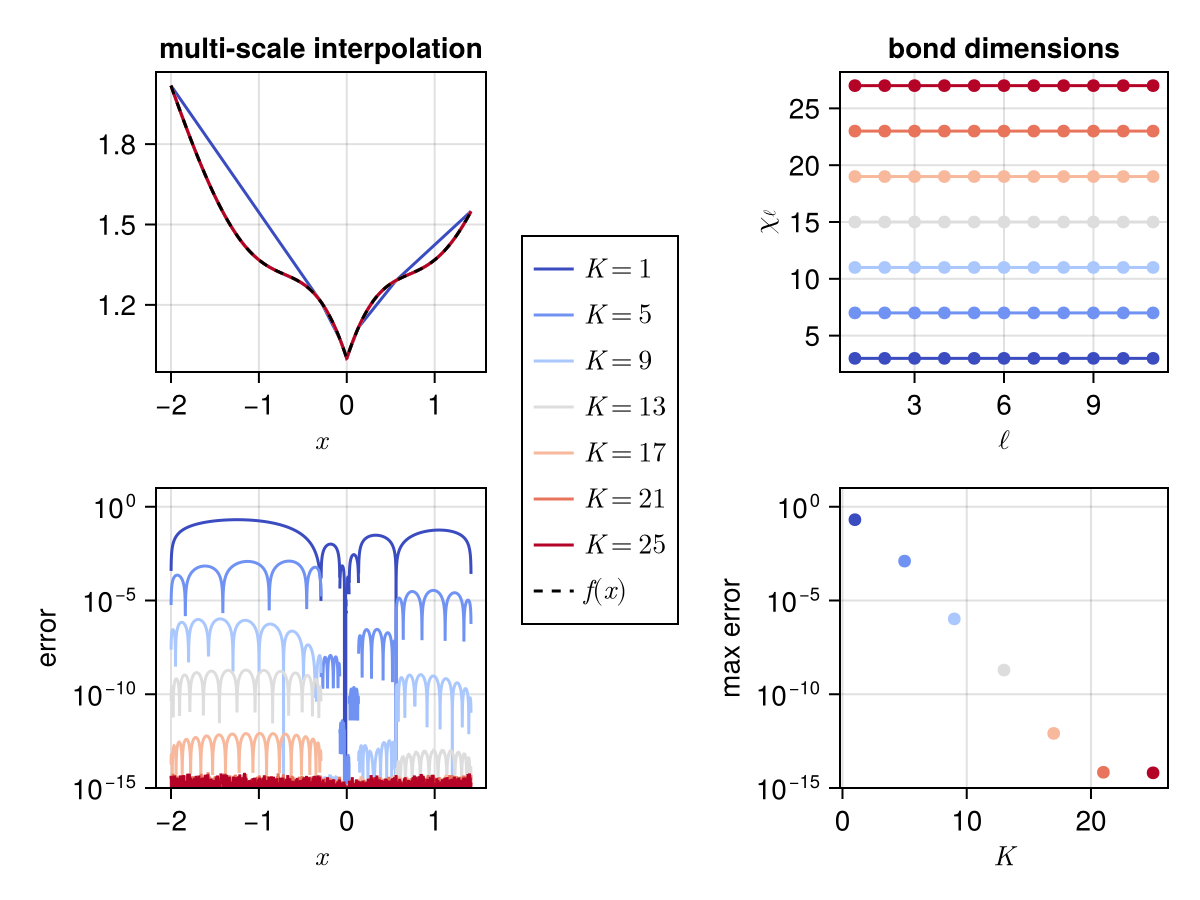

In [3]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel=L"x", title="multi-scale interpolation")
axerr = Axis(fig[2, 1], yscale=log10, xlabel=L"x", ylabel="error")
axbonddim = Axis(fig[1, 3], xlabel=L"\ell", ylabel=L"\chi_\ell", title="bond dimensions")
axerrK = Axis(fig[2, 3], yscale=log10, xlabel=L"K", ylabel="max error")

for K in 1:4:Kmax
    tt = PolynomialQTT.interpolatemultiscale(f, a, b, R, K, Float64[0])
    ttdata = tt.(plotquantics)
    colorkwargs = (:color=>K, :colorrange=>(1, Kmax), :colormap=>:coolwarm)
    lines!(ax, plotx, ttdata, label=L"K=%$K"; colorkwargs...)
    lines!(axerr, plotx, abs.(ttdata .- origdata); colorkwargs...)
    scatterlines!(axbonddim, 1:R-1, TCI.linkdims(tt); colorkwargs...)
    scatter!(axerrK, K, maximum(abs, ttdata .- origdata); colorkwargs...)
end
lines!(ax, plotx, origdata, linestyle=:dash, color=:black, label=L"f(x)")

Legend(fig[1:2, 2], ax)
ylims!(axerr, 1e-15, 1e1)
ylims!(axerrK, 1e-15, 1e1)

save("multiscale.pdf", fig)

fig

In [4]:
svd(tt[1][1, :, :])

UndefVarError: UndefVarError: `tt` not defined

In [5]:
tt[2]

UndefVarError: UndefVarError: `tt` not defined

In [6]:
tt[3]

UndefVarError: UndefVarError: `tt` not defined

In [7]:
tt[4]

UndefVarError: UndefVarError: `tt` not defined